In [1]:
%run notebook_setup.py

sys.path.append('../..')

In [2]:
from standardiser import rules

from standardiser.rules_demo import rules_table, show_change

In [3]:
rules.logger.setLevel('DEBUG')

### 4-hydroxy pyridines

If the rule '[4-hydroxy pyridine -> 4-pyridone (within-ring)](03_rules.ipynb#4-hydroxy_pyridine_-_4-pyridone_within-ring)' is not enabled, the more general rule '[4-hydroxy pyridine -> 4-pyridone (any)](03_rules.ipynb#4-hydroxy_pyridine_-_4-pyridone_any)' alone can give undesirable effects.

The following molecule is an example (note that the 'within-ring' version of the rule is temporarily disbled for this demo)...

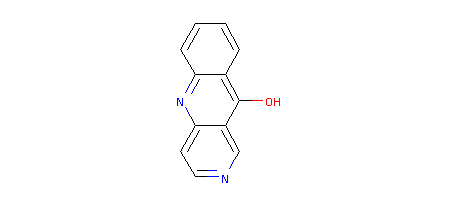

In [4]:
mol = Chem.MolFromSmiles("C[n+]1ccc)Ncc1")

mol

[2016/Mar/24 16:26:11 DEBUG   ] apply> mol = 'Oc1c2ccccc2nc2ccncc12'
[2016/Mar/24 16:26:11 DEBUG   ] apply> starting pass 1...
[2016/Mar/24 16:26:11 DEBUG   ] rule 4 '4-hydroxy pyridine -> 4-pyridone (any)' applied on pass 1
[2016/Mar/24 16:26:11 DEBUG   ] ...total of 1 hits in pass: will continue...
[2016/Mar/24 16:26:11 DEBUG   ] apply> starting pass 2...
[2016/Mar/24 16:26:11 DEBUG   ] ...total of 0 hits in pass: finished.


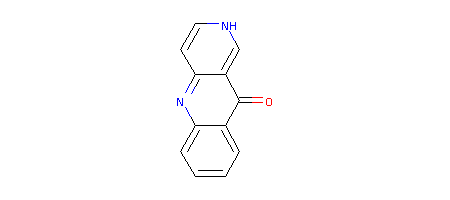

In [5]:
# Temporarily remove rule '4-hydroxy pyridine -> 4-pyridone (within-ring)', then apply rules...

original_rules = rules.rule_set

rules.rule_set = [x for x in original_rules if x['name'] !=  '4-hydroxy pyridine -> 4-pyridone (within-ring)']

rules.apply(mol)

Note that the 'across-ring' product had been produced, instead of the desired 'within-ring' product. 

If the restrictive 'within-ring' version of the rule (which is applied before the more general version) is re-enabled, the desired product is obtained...

[2016/Mar/24 16:26:11 DEBUG   ] apply> mol = 'Oc1c2ccccc2nc2ccncc12'
[2016/Mar/24 16:26:11 DEBUG   ] apply> starting pass 1...
[2016/Mar/24 16:26:11 DEBUG   ] rule 3 '4-hydroxy pyridine -> 4-pyridone (within-ring)' applied on pass 1
[2016/Mar/24 16:26:11 DEBUG   ] ...total of 1 hits in pass: will continue...
[2016/Mar/24 16:26:11 DEBUG   ] apply> starting pass 2...
[2016/Mar/24 16:26:11 DEBUG   ] ...total of 0 hits in pass: finished.


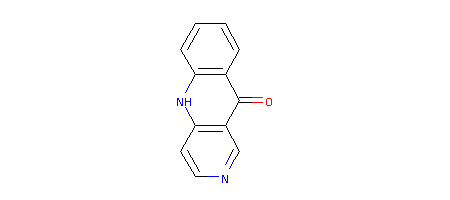

In [6]:
# Restore rule '4-hydroxy pyridine -> 4-pyridone (within-ring)', then apply rules...

rules.rule_set = original_rules

rules.apply(mol)

Note that the desired 'within-ring' product has been produced, instead of the 'across-ring' product.

An example of where this problem manifested is [CHEMBL348887](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL348887).

Note that if only the more general rule is enabled, the problem might not be obvious. This is because which substructure (_i.e._ the within-ring or across-ring version) is affected is arbitrary, depending on the order of the atoms in the input molecule. 